## Zomato Bangalore Restaurant Trends

`Objective`
The aim of this hackathon is to perform data-driven analysis of restaurant trends in Bangalore using Zomato’s real-world dataset. Participants are expected to:

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display, HTML
import time
import warnings

In [253]:
warnings.filterwarnings('ignore')

In [254]:
df = pd.read_csv(r"C:\Users\Desktop\Hackathon\zomato_data.csv")

## Simple EDA

In [255]:
df.head()

online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian                       800        Buffet   
3      South Indian, North Indian                       300        Buffet   
4        North Indian, Rajasthani                       600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [257]:
df.shape

(51717, 10)

In [258]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

## Data Pre-processing

---

### A) Rate Column

In [259]:
df["rate"]

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

#### Replacing "-" with NaN

In [260]:
df["rate"].str.contains("-").sum()

69

In [261]:
df["rate"].replace("-", np.nan, inplace=True)

In [262]:
df["rate"].str.contains("-").sum()

0

### Removing "/5" by replace method and using strip() to remove whitespaces

In [263]:
df["rate"] = df["rate"].str.replace("/5", "").str.strip()

In [264]:
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: object

In [265]:
df["rate"].value_counts()

rate
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
NEW    2208
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

#### Insight: as we see there is a value "NEW" that we should replace with NaN

---

In [266]:
df["rate"].replace("NEW", np.nan, inplace=True)

In [267]:
df["rate"].value_counts()

rate
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

#### Insight: Successfully replace with NaN

---

### Converting into float datatype

In [268]:
df["rate"] = pd.to_numeric(df["rate"])

In [269]:
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

### Fill missing values using the median rating

In [270]:
df["rate"].fillna(df["rate"].median(), inplace=True)

In [271]:
df["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

---

### B) Cost Column (approx_costfor_two_people)

In [272]:
df["approx_costfor_two_people"]

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_costfor_two_people, Length: 51717, dtype: object

#### Remove commas from numeric strings ('1,000' → '1000')

In [273]:
df["approx_costfor_two_people"] = df["approx_costfor_two_people"].str.replace(",", "")

In [274]:
df["approx_costfor_two_people"] 

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_costfor_two_people, Length: 51717, dtype: object

#### Convert to numeric

In [275]:
df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'])

In [276]:
df['approx_costfor_two_people'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_costfor_two_people, dtype: float64

#### Filling Missing Values with median

In [277]:
df['approx_costfor_two_people'].isna().sum()

np.int64(346)

In [278]:
df['approx_costfor_two_people'].fillna(df['approx_costfor_two_people'].median(), inplace=True)

In [279]:
df['approx_costfor_two_people'].isna().sum()

np.int64(0)

---

### C) Categorical Columns

#### dish_liked → Replace NaN with "Not Available"

In [280]:
df['dish_liked'].head()

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2    Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                          Masala Dosa
4                                  Panipuri, Gol Gappe
Name: dish_liked, dtype: object

In [281]:
df['dish_liked'].isna().sum()

np.int64(28078)

In [282]:
df['dish_liked'].replace(np.nan, "Not Available", inplace=True)

In [283]:
df['dish_liked'].isna().sum()

np.int64(0)

#### cuisines → Replace NaN with "Other"

In [284]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [285]:
df['cuisines'].isna().sum()

np.int64(45)

In [286]:
df['cuisines'].replace(np.nan, "Other", inplace=True)

In [287]:
df['cuisines'].isna().sum()

np.int64(0)

#### rest_type → Replace NaN with "Unknown"

In [288]:
df['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

In [289]:
df['rest_type'].isna().sum()

np.int64(227)

In [290]:
df['rest_type'].replace(np.nan, "Unknown", inplace=True)

In [291]:
df['rest_type'].isna().sum()

np.int64(0)

----

### D) Votes Column

#### Fill missing values in votes with median

In [292]:
df["votes"].isna().sum()

np.int64(0)

---

### E) Binary Encoding

In [293]:
df['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [294]:
df['online_order'] = df['online_order'].map( {"Yes" : 1 , "No" :0})

In [295]:
df['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 51717, dtype: int64

In [296]:
df['book_table']

0        Yes
1         No
2         No
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715    Yes
51716     No
Name: book_table, Length: 51717, dtype: object

In [297]:
df['book_table'] = df['book_table'].map( {"Yes" : 1 , "No" :0})

In [298]:
df['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 51717, dtype: int64

---

### F) Data Type Conversion

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


#### df['rate']

In [300]:
## Converted into float32 for better memory usage

df['rate' ] = df['rate'].astype(np.float32)

In [301]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float32

#### df['votes']

In [302]:
df['votes']

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

In [303]:
df['votes'] = df['votes'].astype(np.int32)

In [304]:
df['votes']

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int32

#### df['approx_costfor_two_people']

In [305]:
df['approx_costfor_two_people']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_costfor_two_people, Length: 51717, dtype: float64

In [306]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(np.int32)

In [307]:
df['approx_costfor_two_people']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_costfor_two_people, Length: 51717, dtype: int32

### Final info()

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float32
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float32(1), int32(2), int64(2), object(5)
memory usage: 3.4+ MB


### Merging the data

In [455]:
df2 = pd.read_csv(r"C:\Users\Desktop\Hackathon\Geographical Coordinates.csv")

In [457]:
merged_df = pd.merge(df, df2, on='listed_incity', how='left')

In [458]:
merged_df

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
51712                             Continental                       1500   
51713                             Finger Food                        600   
51714                             Finger Food                       2000   
51715                             Finger Food                       2500   
51716  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity  potential_revenue   Latitude  Longitude  
0             Buffet  Banashankari             620000  12.939333  77.553982  
1             Buffet  Banashankari             629600  12.939333  77.553982  
2             Buffet  Banashankari             734400  12.939333  77.553982  
3             Buffet  Banashankari              26400  12.939333  77.553982  
4             Buffet  Banashankari              99600  12.939333  77.553982  
...              ...           ...                ...        ...        ...  
51712  Pubs and bars    Whitefield              40500        NaN        NaN  
51713  Pubs and bars    Whitefield                  0        NaN        NaN  
51714  Pubs and bars    Whitefield                  0        NaN        NaN  
51715  Pubs and bars    Whitefield             590000        NaN        NaN  
51716  Pubs and bars    Whitefield              19500        NaN        NaN  

[51717 rows x 13 columns]

---

## EDA

### `Online Order Availability`

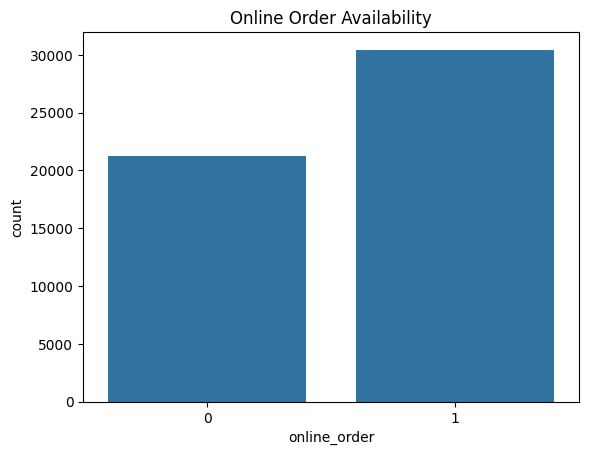

In [454]:
sns.countplot(data=df, x='online_order')
plt.title("Online Order Availability")
plt.show()

+ `Insight`: Many Banglore restaurants have `online order options`

---

### `Top 5 Restaurant Types in Banglore`

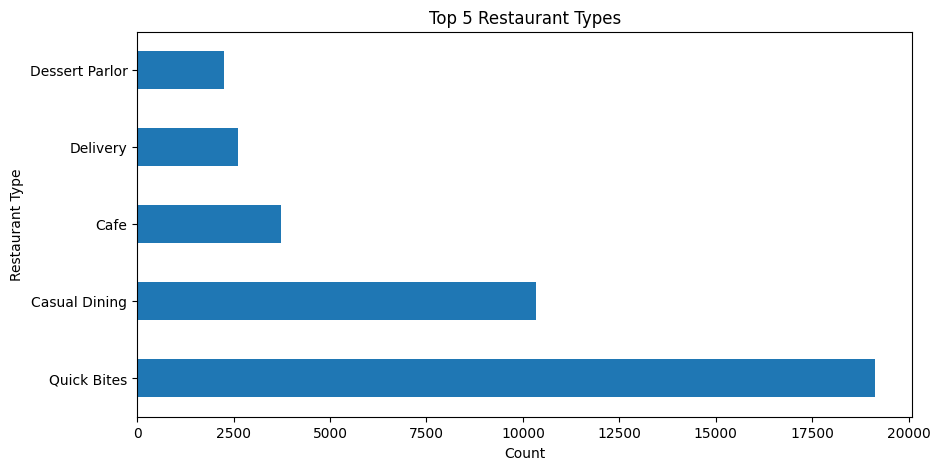

In [459]:
df['rest_type'].value_counts().head(5).plot(kind='barh', figsize=(10, 5))
plt.title("Top 5 Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

+ `Insight`: Many Banglore restaurants are of `Quick Bites` Type

---

### `Top 5 Restaurant Cuisines in Banglore`

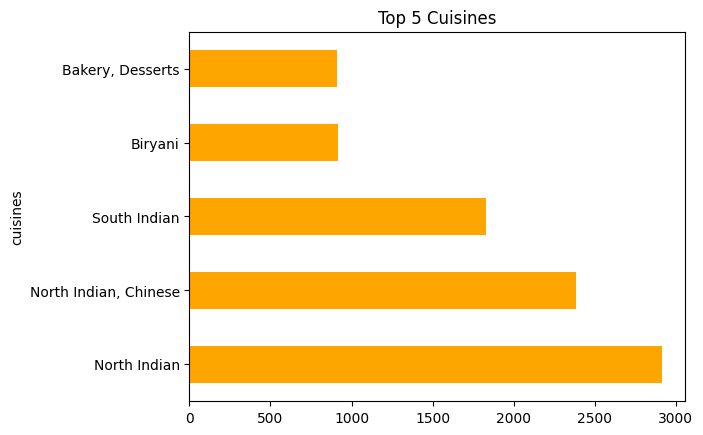

In [460]:
df['cuisines'].value_counts().head(5).plot(kind='barh', color='orange')
plt.title("Top 5 Cuisines")
plt.show()

+ `Insight`: `50%` of Banglore restaurants have `North Indian` cuisines 

---

### `Top 10 Banglore cities having most restaurants`

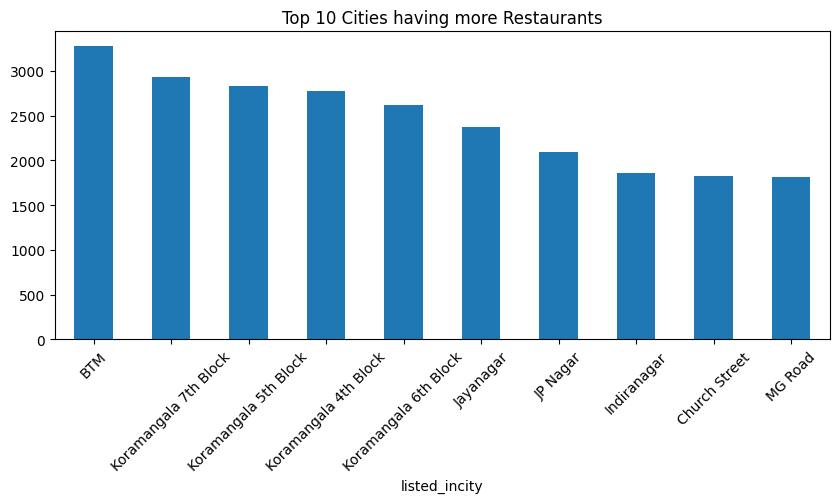

In [463]:
df['listed_incity'].value_counts()[:10].plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Cities having more Restaurants")
plt.xticks(rotation=45)
plt.show()

+ `Insight`: Mostly `Koranmangala City` have more Restaurents

---

### `Top 5 Restaurant Types with Most Votes`

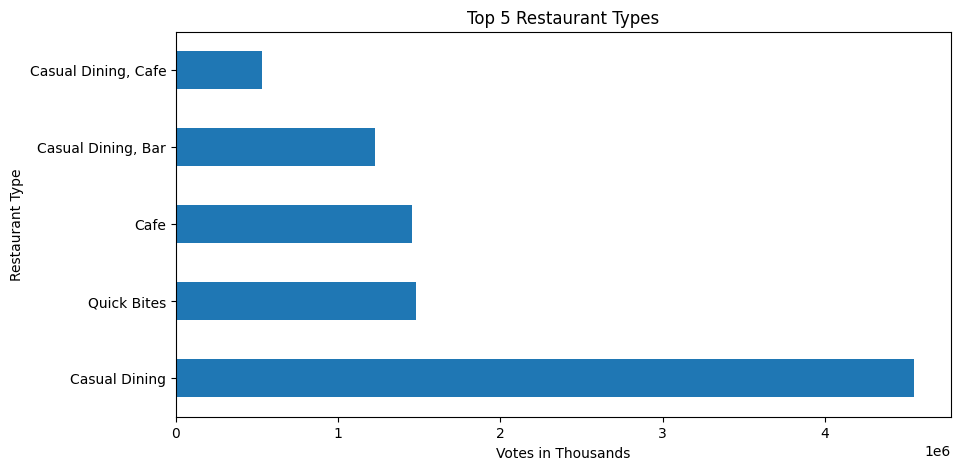

In [477]:
df.groupby('rest_type')['votes'].sum().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10, 5))
plt.title("Top 5 Restaurant Types")
plt.xlabel("Votes in Thousands")
plt.ylabel("Restaurant Type")
plt.show()

+ `Insight`: `Casual Dining` restaurant type have `most votes`

---

### `Distribution of Ratings`

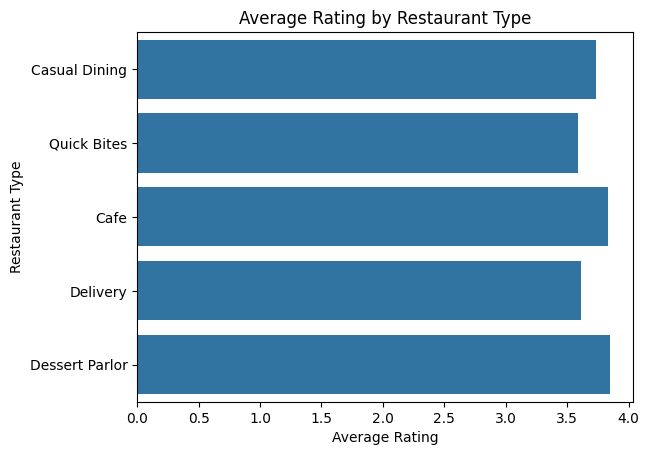

In [478]:
top_types = df['rest_type'].value_counts().head(5).index
top_df = df[df['rest_type'].isin(top_types)]

sns.barplot(data=top_df, x='rate', y='rest_type', estimator='mean', ci=None)
plt.title("Average Rating by Restaurant Type")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Type")
plt.show()

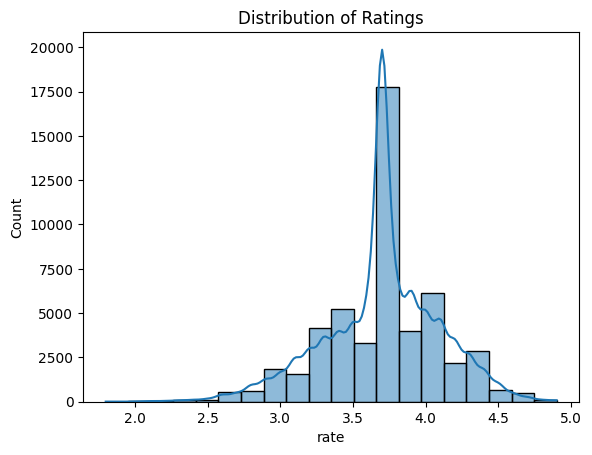

In [486]:
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()

+ `Insight`: Mostly Restaurents Rating lies in `2.5 to 4.5`
---

### `Restaurent Votes VS Cost`

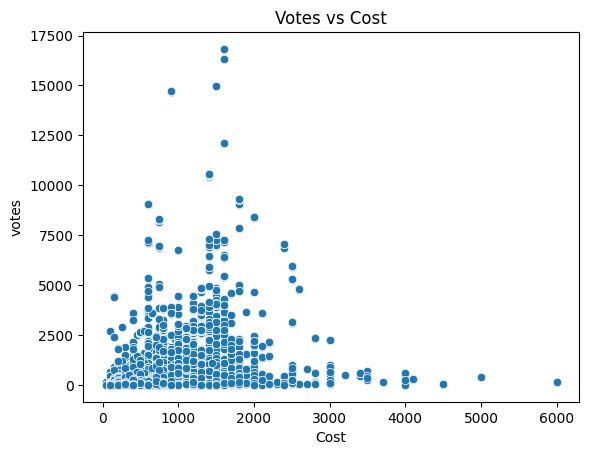

In [489]:
sns.scatterplot(data=df, x='approx_costfor_two_people', y='votes')
plt.title("Votes vs Cost")
plt.xlabel("Cost")
plt.show()

+ `Insight`: if we clearly see as `cost` is `increasing`, `votes` are `decreasing` , So we can say most of peoples prefer low cost restuarents

In [491]:
merged_df

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
51712                             Continental                       1500   
51713                             Finger Food                        600   
51714                             Finger Food                       2000   
51715                             Finger Food                       2500   
51716  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity  potential_revenue   Latitude  Longitude  
0             Buffet  Banashankari             620000  12.939333  77.553982  
1             Buffet  Banashankari             629600  12.939333  77.553982  
2             Buffet  Banashankari             734400  12.939333  77.553982  
3             Buffet  Banashankari              26400  12.939333  77.553982  
4             Buffet  Banashankari              99600  12.939333  77.553982  
...              ...           ...                ...        ...        ...  
51712  Pubs and bars    Whitefield              40500        NaN        NaN  
51713  Pubs and bars    Whitefield                  0        NaN        NaN  
51714  Pubs and bars    Whitefield                  0        NaN        NaN  
51715  Pubs and bars    Whitefield             590000        NaN        NaN  
51716  Pubs and bars    Whitefield              19500        NaN        NaN  

[51717 rows x 13 columns]

## Restaurant Density Map

In [492]:
import folium
from folium.plugins import HeatMap

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

heat_data = list(zip(heat_df['Latitude'], heat_df['Longitude']))
HeatMap(heat_data, radius=15).add_to(bangalore_map)

bangalore_map.save("bangalore_restaurant_density_map.html")
bangalore_map

## Cuisine-Specific Map (Italian Restaurants)

In [494]:
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", case=False, na=False)]

In [496]:
import folium

italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for index, row in italian_df.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['listed_intype']}<br>{row['rest_type']}<br>⭐ {row['rate']}",
        icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
    ).add_to(italian_map)

italian_map.save("italian_restaurants_bangalore.html")
italian_map

---

## Questions

In [309]:
df.head()

online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

#### Q1. What is the shape of the given dataset?

In [310]:
df.shape

(51717, 10)

#### Q2. How many restaurants serve North Indian cuisine?

In [311]:
df['cuisines'].str.contains("North Indian").sum()

np.int64(21085)

#### Q3. What cuisine is most commonly offered by restaurants in Bangalore?

In [312]:
df['cuisines'].value_counts()

cuisines
North Indian                                 2913
North Indian, Chinese                        2385
South Indian                                 1828
Biryani                                       918
Bakery, Desserts                              911
                                             ... 
Chinese, Biryani, North Indian, Beverages       1
American, Thai, Healthy Food                    1
South Indian, Fast Food, Beverages              1
Chinese, Cafe                                   1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2724, dtype: int64

#### Q4. Which locality in Bangalore has the highest average cost for dining (for two people)?

#### Insight: As our data is for Banglore so `North Indian` cuisine is most commonly offered

In [322]:
df.groupby('listed_incity')['approx_costfor_two_people'].mean().idxmax()

'Church Street'

#### Q5. Which restaurant type has the top rating with over 1000 votes?

In [328]:
np.max(df[df['votes'] > 1000]['rate'])

np.float32(4.9)

In [361]:
df[df['rest_type'].isin(['Bakery, Cafe', 'Casual Dining, Pub', 'Bakery','Microbrewery, Pub'])].groupby('rest_type')['rate'].idxmax()

rest_type
Bakery                40068
Bakery, Cafe           5048
Casual Dining, Pub    10891
Microbrewery, Pub      7020
Name: rate, dtype: int64

#### Q6. How much does it cost at minimum to eat out in Bangalore?

In [368]:
np.min(df['approx_costfor_two_people'][df['approx_costfor_two_people'].isin( [200 , 500, 300, 1000])])

np.int32(200)

#### Q7. What percentage of total online orders is received by restaurants in Banashankari?

In [417]:
len(df[(df['listed_incity'] == "Banashankari") & (df['online_order'] == 1)]) / len(df['listed_incity'] == "Banashankari")

0.01055745692905621

#### Q8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [395]:
df[(df['votes'] > 500) & (df['rate'] < 3.0)]['listed_incity'].value_counts()

listed_incity
Brookefield              8
Whitefield               6
Indiranagar              4
Old Airport Road         4
Marathahalli             3
Bellandur                3
Banashankari             2
Koramangala 7th Block    2
Koramangala 6th Block    2
Koramangala 5th Block    2
Koramangala 4th Block    2
Sarjapur Road            2
Kammanahalli             1
HSR                      1
Kalyan Nagar             1
Name: count, dtype: int64

#### Q9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [498]:
df.groupby('listed_incity')['rest_type'].sum()

listed_incity
BTM                      Casual DiningCasual DiningCasual Dining, Micro...
Banashankari             Casual DiningCasual DiningCafe, Casual DiningQ...
Bannerghatta Road        PubCasual DiningCasual DiningCasual DiningCasu...
Basavanagudi             Casual DiningCasual DiningCasual DiningCasual ...
Bellandur                Casual DiningCasual Dining, BarCasual DiningCa...
Brigade Road             Casual DiningCasual DiningCasual DiningCasual ...
Brookefield              Casual Dining, CafeCasual DiningCasual Dining,...
Church Street            Casual DiningCasual DiningCasual Dining, BarCa...
Electronic City          Casual DiningCasual DiningPub, Casual DiningCa...
Frazer Town              Casual DiningCasual Dining, BarFine DiningCasu...
HSR                      Casual Dining, BarCasual DiningLounge, Casual ...
Indiranagar              Casual Dining, MicrobreweryCasual DiningPub, M...
JP Nagar                 Casual DiningCasual DiningCasual DiningCasual ...
Jayanagar  

#### Q10. What's the average cost difference between buffet and delivery restaurants?

In [413]:
np.average(df[df['listed_intype'] == "Buffet"]['approx_costfor_two_people']) - np.average(df[df['listed_intype'] == "Delivery"]['approx_costfor_two_people'])

np.float64(831.2513659898209)

#### Q11. What is the maximum number of votes received by any restaurant with online ordering?

In [416]:
df.groupby(df['online_order'] == 1)["votes"].max()

online_order
False    14956
True     16832
Name: votes, dtype: int32

#### Q.12 What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [428]:
np.average(df[(df["cuisines"].str.contains("North Indian") ) & (df['cuisines'].str.contains("Chinese"))]['rate'])

np.float32(3.591908)

#### Q13. What is the most profitable area for Zomato based on potential revenue estimation?

In [431]:
df["potential_revenue"] = df['votes'] * df['approx_costfor_two_people'] 

In [443]:
df.groupby('listed_incity')['potential_revenue'].sum().sort_values(ascending=False).idxmax()

'Koramangala 7th Block'

#### Q14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [442]:
df[df['rate'] < 3.5]['rest_type'].value_counts().idxmax()

'Quick Bites'

#### Q.15 In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [452]:
df[ (df['rate'] > 4.2) & ( df['votes'] > 500 ) & df['online_order'] == 1]['listed_incity'].value_counts().sort_index().idxmax()

'Koramangala 7th Block'